# Ref

[ref](https://jamtrading.jp/blogs/jam/1024509/)

# Design

1. 設定
2. アニメTシャツのデータを楽天API経由で取得
3. 取得したデータから30商品に満たないアニメをデータから落とす
4. anime_name列に格納されている値が、name列に含まれていない商品を落とす
5. anime_name列に対応する別名が、name列に含まれていない商品を落とす
6. コラボ商品ではない商品を落とす
7. キャラ単体をアニメに紐づける
8. ヴィンテージワードを含む商品を残す

# Import

In [1]:
import re
import sys

sys.path.append("../")
import json
import warnings
from string import Template
from time import sleep

import matplotlib.pyplot as plt
import pandas as pd
import requests
from tqdm import tqdm
from vook_db_lambda.config import MAX_PAGE, REQ_URL, WANT_ITEMS_RAKUTEN, req_params


Bad key ; font.family in file /Users/ozawaatsushi/.matplotlib/matplotlibrc, line 262 ('; font.family:  IPAexGothic')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.9.0/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


Now: Local env


In [2]:
anime_list = [
    "AKIRA",
    "攻殻機動隊",
    "鋼の錬金術師",
    "犬夜叉",
    "るろうに剣心",
    "GunSmith Cats",
    "ドラゴンボールZ",
    "NARUTO",
    "サムライチャンプルー",
    "SLAM DUNK",
    "ガッチャマン",
    "Speed Racer",
    "うる星やつら",
    "ジョジョの奇妙な冒険",
]


item = "Tシャツ"
req_params["minPrice"] = 10000
MAX_PAGE = 100
not_200_msg = Template("ErrorCode -> $res_code\nError -> $res['error']\nPage -> $cnt")
not_hit_msg = "返ってきた商品数の数が0なので、ループ終了"
max_page_msg = "MAX PAGEに到達したので、ループ終了"

In [3]:
def loop_request(
    req_params: dict,
    cnt: int,
    df: pd.DataFrame,
    REQ_URL: str = REQ_URL,
    not_200_msg: str = not_200_msg,
    not_hit_msg: str = not_hit_msg,
    max_page_msg: str = max_page_msg,
) -> pd.DataFrame:
    while True:
        req_params["page"] = cnt
        res = requests.get(REQ_URL, req_params)
        res_code = res.status_code
        res = json.loads(res.text)
        d_template = {"res_code": res_code, "res": res, "cnt": cnt}
        if res_code != 200:
            print(not_200_msg.safe_substitute(d_template))
            break
        else:
            if res["hits"] == 0:
                print(not_hit_msg)
                break
            tmp_df = pd.DataFrame(res["Items"])[WANT_ITEMS_RAKUTEN]
            df = pd.concat([df, tmp_df], ignore_index=True)
        if cnt == MAX_PAGE:
            print(max_page_msg)
            break
        cnt += 1
        # リクエスト制限回避
        sleep(1)
    return df

In [4]:
l_df_main = []
for anime_name in tqdm(anime_list):
    print("1:settings")
    cnt = 1
    keyword = " ".join([item, anime_name])
    req_params["page"] = cnt
    req_params["keyword"] = keyword
    print(f"keyword:{keyword}")
    print("2:loop request")
    df = pd.DataFrame(columns=WANT_ITEMS_RAKUTEN)
    df = loop_request(req_params, cnt, df)
    print("3:postprocess")
    df_main = df.rename(
        columns={"itemName": "name", "itemPrice": "price", "itemUrl": "url"}
    )
    df_main["anime_name"] = anime_name
    l_df_main.append(df_main)
df_main_all = pd.concat(l_df_main, ignore_index=True)

  0%|                                                                                                        | 0/14 [00:00<?, ?it/s]

1:settings
keyword:Tシャツ AKIRA
2:loop request


  7%|██████▊                                                                                         | 1/14 [00:05<01:13,  5.62s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ 攻殻機動隊
2:loop request


 14%|█████████████▋                                                                                  | 2/14 [00:07<00:38,  3.25s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ 鋼の錬金術師
2:loop request


 21%|████████████████████▌                                                                           | 3/14 [00:08<00:27,  2.52s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ 犬夜叉
2:loop request


 29%|███████████████████████████▍                                                                    | 4/14 [00:10<00:21,  2.17s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ るろうに剣心
2:loop request


 36%|██████████████████████████████████▎                                                             | 5/14 [00:12<00:18,  2.00s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ GunSmith Cats
2:loop request


 43%|█████████████████████████████████████████▏                                                      | 6/14 [00:12<00:11,  1.42s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ ドラゴンボールZ
2:loop request


 50%|████████████████████████████████████████████████                                                | 7/14 [00:14<00:10,  1.50s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ NARUTO
2:loop request


 57%|██████████████████████████████████████████████████████▊                                         | 8/14 [00:17<00:11,  1.93s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ サムライチャンプルー
2:loop request


 64%|█████████████████████████████████████████████████████████████▋                                  | 9/14 [00:17<00:07,  1.41s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ SLAM DUNK
2:loop request


 71%|███████████████████████████████████████████████████████████████████▊                           | 10/14 [00:18<00:05,  1.46s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ ガッチャマン
2:loop request


 79%|██████████████████████████████████████████████████████████████████████████▋                    | 11/14 [00:19<00:03,  1.10s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ Speed Racer
2:loop request


 86%|█████████████████████████████████████████████████████████████████████████████████▍             | 12/14 [00:21<00:03,  1.52s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ うる星やつら
2:loop request


 93%|████████████████████████████████████████████████████████████████████████████████████████▏      | 13/14 [00:23<00:01,  1.58s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ ジョジョの奇妙な冒険
2:loop request


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:26<00:00,  1.89s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess


In [5]:
print("shape:", df_main_all.shape)

shape: (230, 4)


In [6]:
df_main_all

,name,price,url,anime_name
0,90's AKIRA Full Print 1993 Rare Design S/S Tee...,550000,https://hb.afl.rakuten.co.jp/hgc/g00sltre.brn1...,AKIRA
1,VINTAGE(ヴィンテージ) 90s AKIRA T-shirt ヴィンテージ 鉄雄 グリ...,240900,https://hb.afl.rakuten.co.jp/hgc/g00s6rie.brn1...,AKIRA
2,【中古】ヴィンテージ VINTAGE 80s～90s AKIRA KANEDA EXPLOD...,210000,https://hb.afl.rakuten.co.jp/hgc/g00rwi1e.brn1...,AKIRA
3,ヴィンテージ VINTAGE サイズ:L AKIRA アキラ 金田vsジョーカープリントTシ...,206910,https://hb.afl.rakuten.co.jp/hgc/g00qmcve.brn1...,AKIRA
4,ヴィンテージ VINTAGE サイズ:L AKIRA アキラ Neo-TokyoプリントTシ...,179322,https://hb.afl.rakuten.co.jp/hgc/g00qmcve.brn1...,AKIRA
...,...,...,...,...
225,JOJO x glamb・グラム カーズ ロングスリーブ T Kars long sleev...,11000,https://hb.afl.rakuten.co.jp/hgc/g00qdn6e.brn1...,ジョジョの奇妙な冒険
226,古着 ジョジョの奇妙な冒険 キャラクタープリントTシャツ メンズM /eaa442939 【...,11000,https://hb.afl.rakuten.co.jp/hgc/g00qhzfe.brn1...,ジョジョの奇妙な冒険
227,glamb グラム 半袖Tシャツ ユニセックス 徐倫ポケットT GB0422/JJ01 ホワ...,11000,https://hb.afl.rakuten.co.jp/hgc/g00ug4ue.brn1...,ジョジョの奇妙な冒険
228,JOJO x glamb グラム Jolyne Pocket T / 徐倫ポケット Tシャツ,11000,https://hb.afl.rakuten.co.jp/hgc/g00qdn6e.brn1...,ジョジョの奇妙な冒険


In [7]:
anime_list

['AKIRA',
 '攻殻機動隊',
 '鋼の錬金術師',
 '犬夜叉',
 'るろうに剣心',
 'GunSmith Cats',
 'ドラゴンボールZ',
 'NARUTO',
 'サムライチャンプルー',
 'SLAM DUNK',
 'ガッチャマン',
 'Speed Racer',
 'うる星やつら',
 'ジョジョの奇妙な冒険']

In [28]:
# 表記揺れ対応用の辞書を作成
anime_aliases = {
    "AKIRA": [
        "アキラ",
        "akira",
    ],
    "攻殻機動隊": [],
    "鋼の錬金術師": [],
    "犬夜叉": [],
    "るろうに剣心": [],
    "GunSmith Cats": [
        "Gun Smith Cats",
        "GUNSMITH CATS",
        "GUN SMITH CATS",
        "ガンスミスキャッツ",
        "ガンスミス キャッツ",
    ],
    "ドラゴンボールZ": [],
    "NARUTO": [
        "ナルト",
    ],
    "サムライチャンプルー": [],
    "SLAM DUNK": [
        "スラムダンク",
        "SLUMDUNK",
    ],
    "ガッチャマン": [],
    "Speed Racer": [
        "SPEED RACER",
        "スピードレーサー",
        "スピード レーサー",
    ],
    "うる星やつら": [
        "うるせえやつら",
    ],
    "ジョジョの奇妙な冒険": [
        "ジョジョ",
    ],
}
# コラボブランド対応用
other_brand_list = [
    "COMMEdesGARCONS",
    "コムデギャルソン",
    "CHROME HEARTS",
    "クロムハーツ",
    "Supreme",
    "シュプリーム",
    "TMT",
    "Paul Smith",
    "glamb",
    "Adam et Rope",
    "HYSTERIC GLAMOUR",
    "XXX",
    "Sadistic Action",
    "MINEDENIM",
    "クリスチャンディオール",
    "HALFMAN",
]


# 関数を定義してアニメ名を含むレコードを検出
def is_valid_record(anime_name, product_name, anime_aliases):
    if anime_name not in anime_aliases:
        return False
    aliases = [anime_name] + anime_aliases[anime_name]
    pattern = r"(" + "|".join(re.escape(alias) for alias in aliases) + r")"

    # Check if product_name contains any of the other brands
    other_brand_pattern = (
        r"(" + "|".join(re.escape(brand) for brand in other_brand_list) + r")"
    )
    if re.search(other_brand_pattern, product_name, re.IGNORECASE):
        return False

    return bool(re.search(pattern, product_name, re.IGNORECASE))


# 不正なレコードの検出
df_main_all["is_valid"] = df_main_all.apply(
    lambda row: is_valid_record(row["anime_name"], row["name"], anime_aliases),
    axis=1,
)
invalid_records = df_main_all[~df_main_all["is_valid"]]
valid_records = df_main_all[df_main_all["is_valid"]]

In [12]:
# # TODO:アーティスト単体
# df_kurt_cobain = valid_records[valid_records["anime_name"] == "カートコバーン"].copy()
# df_not_kurt_cobain = valid_records[
#     valid_records["anime_name"] != "カートコバーン"
# ].copy()
# df_kurt_cobain["anime_name"] = "ニルヴァーナ"
# valid_records_after = pd.concat([df_not_kurt_cobain, df_kurt_cobain], ignore_index=True)

In [31]:
patterns = [
    r"DEADSTOCK",
    r"deadstock",
    r"デッドストック",
    r"ヴィンテージ",
    r"vintage",
    r"VINTAGE",
    r"\b\d{2}s",
    r"\b\d{2}S",
    r"\b\d{2}'s",
    r"\b\d{2}'S",
    r"\b\d{2}年",
    r"\b19\d{2}",
]

# パターンを組み合わせて1つの正規表現パターンを作成
combined_pattern = r"(" + "|".join(patterns) + r")"

In [33]:
# df_last = valid_records_after[
#     [
#         bool(re.search(combined_pattern, item, re.IGNORECASE))
#         for item in valid_records_after["name"]
#     ]
# ]

df_last = valid_records[
    [
        bool(re.search(combined_pattern, item, re.IGNORECASE))
        for item in valid_records["name"]
    ]
]

In [36]:
# s = df_last.groupby("anime_name").nunique()["name"]
# df_product_num_per_anime_name = s.reset_index()
# sample_size = 30
# anime_list_over_sample_size = df_product_num_per_anime_name[
#     df_product_num_per_anime_name["name"] > sample_size
# ]["anime_name"].tolist()
# print("十分なサンプルサイズを持つアニメ名", anime_list_over_sample_size)

In [37]:
# df_last = df_last[df_last["anime_name"].isin(anime_list_over_sample_size)].reset_index(
#     drop=True
# )

In [38]:
print(f"{df_main_all.shape[0] - df_last.shape[0]}のレコードが削減されました。")

199のレコードが削減されました。


In [45]:
df_last.to_csv("../data/output/rakuten_animeTshirts_prices/output_2.csv", index=False)

In [46]:
df_last = pd.read_csv("../data/output/rakuten_animeTshirts_prices/output_2.csv")

In [47]:
df_last

,name,price,url,anime_name,is_valid
0,90's AKIRA Full Print 1993 Rare Design S/S Tee...,550000,https://hb.afl.rakuten.co.jp/hgc/g00sltre.brn1...,AKIRA,True
1,VINTAGE(ヴィンテージ) 90s AKIRA T-shirt ヴィンテージ 鉄雄 グリ...,240900,https://hb.afl.rakuten.co.jp/hgc/g00s6rie.brn1...,AKIRA,True
2,【中古】ヴィンテージ VINTAGE 80s～90s AKIRA KANEDA EXPLOD...,210000,https://hb.afl.rakuten.co.jp/hgc/g00rwi1e.brn1...,AKIRA,True
3,ヴィンテージ VINTAGE サイズ:L AKIRA アキラ 金田vsジョーカープリントTシ...,206910,https://hb.afl.rakuten.co.jp/hgc/g00qmcve.brn1...,AKIRA,True
4,ヴィンテージ VINTAGE サイズ:L AKIRA アキラ Neo-TokyoプリントTシ...,179322,https://hb.afl.rakuten.co.jp/hgc/g00qmcve.brn1...,AKIRA,True
5,ヴィンテージ VINTAGE サイズ:L AKIRA アキラ バイクプリントTシャツ(ホワイ...,165528,https://hb.afl.rakuten.co.jp/hgc/g00qmcve.brn1...,AKIRA,True
6,【中古】ヴィンテージ VINTAGE ITEM FRUIT OF THE LOOM 90's...,154000,https://hb.afl.rakuten.co.jp/hgc/g00tpkue.brn1...,AKIRA,True
7,FASHION VICTIM Tシャツ 80's vintage AKIRA (C)1988...,140800,https://hb.afl.rakuten.co.jp/hgc/g00u9rpe.brn1...,AKIRA,True
8,FASHION VICTIM Tシャツ 80's vintage 半袖 カットソー トップス...,107800,https://hb.afl.rakuten.co.jp/hgc/g00u9rpe.brn1...,AKIRA,True
9,VINTAGE(ヴィンテージ) サイズ:M 80s～90s VINTAGE AKIRA 19...,97020,https://hb.afl.rakuten.co.jp/hgc/g00s6rie.brn1...,AKIRA,True


# 価格集計

In [22]:
s = df_last.groupby("anime_name")["price"].median()
print(
    "アニメ別商品数:",
    s.sort_values(ascending=False),
)

バンド別商品数: band_name
ニルヴァーナ        51400.0
PINK FLOYD    31735.0
METALLICA     24775.0
ローリングストーンズ    19150.0
KISS          17600.0
Name: price, dtype: float64


ローリングストーンズ：商品数：94


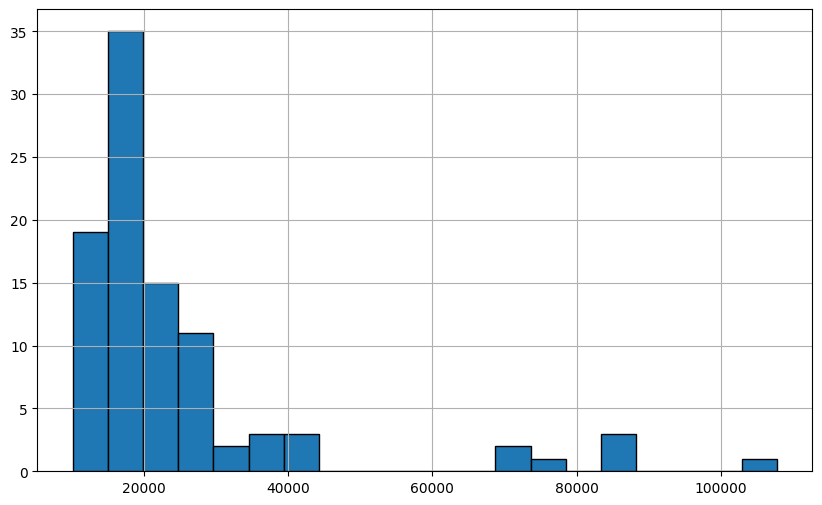

METALLICA：商品数：86


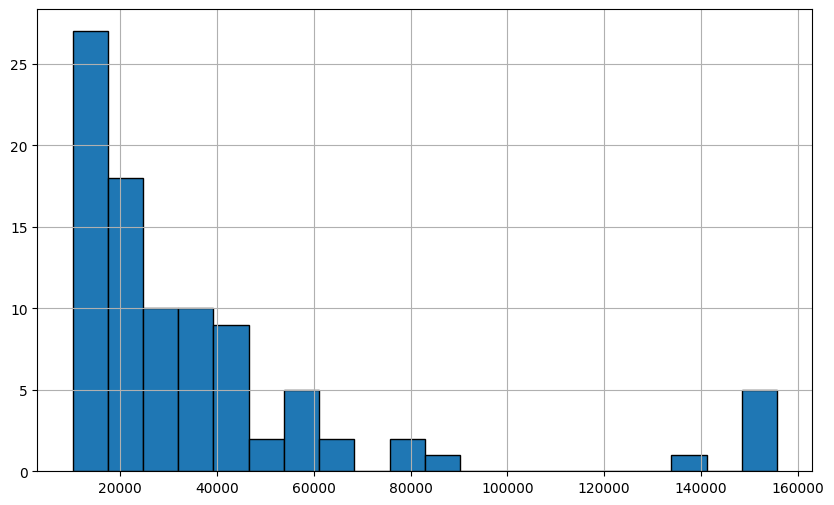

KISS：商品数：43


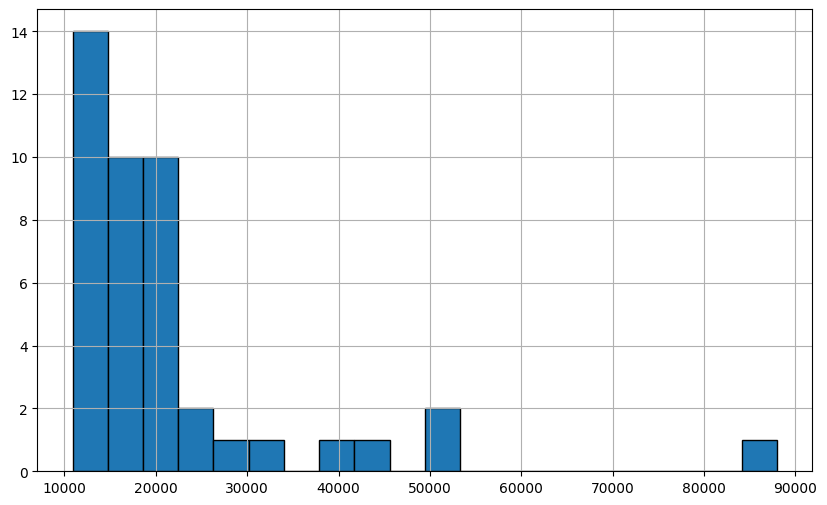

ニルヴァーナ：商品数：77


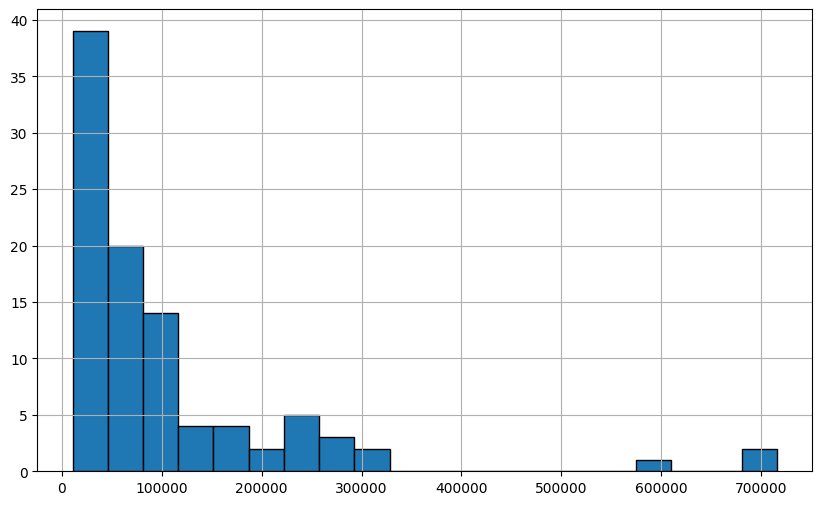

PINK FLOYD：商品数：54


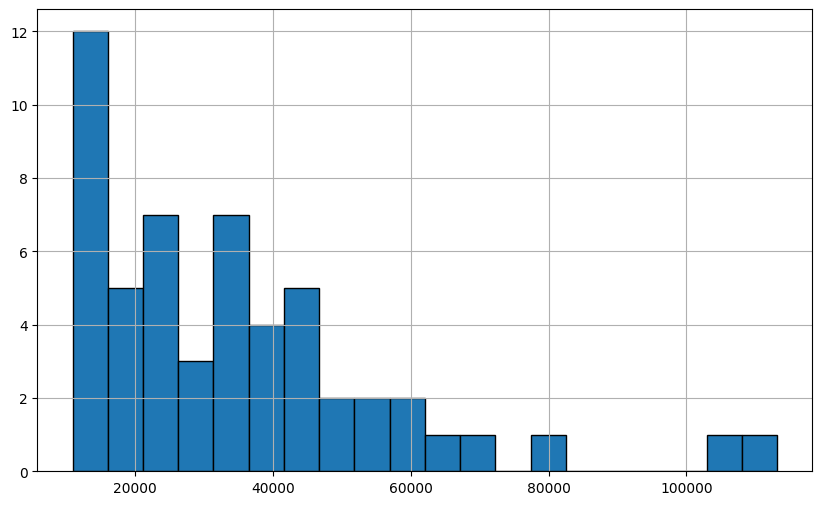

In [23]:
# アニメごとに価格帯の分布をプロット
animes = df_last["anime_name"].unique()
with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)
    for anime in animes:
        print(
            f"{anime}：商品数：{df_last[df_last['anime_name'] == anime]['name'].nunique()}"
        )
        anime_data = df_last[df_last["anime_name"] == anime]
        plt.figure(figsize=(10, 6))
        plt.hist(anime_data["price"], bins=20, edgecolor="black")
        plt.grid(True)
        plt.show()

In [24]:
print(
    "アニメ別平均価格:",
    df_last.groupby("anime_name")["price"].mean().sort_values(ascending=False),
)

バンド別平均価格: band_name
ニルヴァーナ        100245.395833
METALLICA      37161.184783
PINK FLOYD     34771.833333
ローリングストーンズ     24717.831579
KISS           21673.790698
Name: price, dtype: float64
